In [1]:
import pandas as pd

# Cositas

In [73]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import umap.umap_ as umap
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap

my_colors = ['red', 'blue', 'green', 'purple', 'orange','black','cyan']
my_cmap = ListedColormap(my_colors)

def higher_visualization(df, cmap):
    # Separate labels and features
    y_raw = df.iloc[:, 0].values  # labels (first column)
    X = df.iloc[:, 1:].values     # features (rest columns)

    # Convert string labels to integers
    le = LabelEncoder()
    y = le.fit_transform(y_raw)

    # Prepare figure with 1 row and 3 subplots
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))

    # PCA
    X_pca = PCA(n_components=2).fit_transform(X)
    axs[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=cmap)
    axs[0].set_title("PCA")

    # t-SNE
    X_tsne = TSNE(n_components=2, perplexity=5, random_state=0).fit_transform(X)
    axs[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap=cmap)
    axs[1].set_title("t-SNE")

    # UMAP
    X_umap = umap.UMAP(random_state=0).fit_transform(X)
    axs[2].scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap=cmap)
    axs[2].set_title("UMAP")

    plt.tight_layout()
    plt.show()

In [ ]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import umap.umap_ as umap
import matplotlib.pyplot as plt
import numpy as np

def fused_visualization(
    df, values, cmap='jet',
    class_colors=None,
    alpha_overlay=0.6,
    marker_size_overlay=200,
    marker_size_outline=10,
    linewidths_outline=0.9
):
    # Labels and features
    y_raw = df.iloc[:, 0].values       # First column = labels
    X = df.iloc[:, 1:].values           # Rest = features
    
    # Encode classes numerically
    le = LabelEncoder()
    y = le.fit_transform(y_raw)
    unique_classes = list(np.unique(y_raw))
    
    # Dimensionality reductions
    X_pca = PCA(n_components=2).fit_transform(X)
    X_tsne = TSNE(n_components=2, perplexity=5, random_state=0).fit_transform(X)
    X_umap = umap.UMAP(random_state=0).fit_transform(X)
    embeddings = [X_pca, X_tsne, X_umap]
    titles = ['PCA', 't-SNE', 'UMAP']

    # Set up subplots
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))

    for ax, coords, title in zip(axs, embeddings, titles):
        pc1, pc2 = coords[:, 0], coords[:, 1]

        # 1️⃣ Overlay continuous variable as translucent scatter
        sc = ax.scatter(
            pc1, pc2,
            c=values,
            cmap=cmap,
            s=marker_size_overlay,
            alpha=alpha_overlay,
            edgecolor='none'
        )

        # 2️⃣ Outline by class color
        for cls in unique_classes:
            mask = y_raw == cls
            ax.scatter(
                pc1[mask], pc2[mask],
                facecolors='none',
                edgecolor=class_colors.get(cls, 'black') if class_colors else 'black',
                linewidths=linewidths_outline,
                label=cls,
                s=marker_size_outline
            )
        ax.set_title(title)
        ax.set_xlabel('Dim 1')
        ax.set_ylabel('Dim 2')
        ax.grid(True)

    # Single colorbar for continuous variable
    cbar = fig.colorbar(sc, ax=axs, label='Continuous value')
    axs[0].legend(title='Class')
    plt.tight_layout()
    plt.show()

In [ ]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import umap.umap_ as umap
import matplotlib.pyplot as plt
import numpy as np

def fused_visualization_grid(
    df,
    feat_df,             # full feature DataFrame
    cmap='jet',
    class_colors=None,
    alpha_overlay=0.6,
    marker_size_overlay=200,
    marker_size_outline=10,
    linewidths_outline=0.9
):
    # Labels and features
    y_raw = df.iloc[:, 0].values  # First column = labels
    X = df.iloc[:, 1:].values     # Rest = features
    le = LabelEncoder()
    y = le.fit_transform(y_raw)
    unique_classes = list(np.unique(y_raw))
    feature_names = list(feat_df.columns)
    n_feats = len(feature_names)

    # Compute embeddings
    X_pca = PCA(n_components=2).fit_transform(X)
    X_tsne = TSNE(n_components=2, perplexity=5, random_state=0).fit_transform(X)
    X_umap = umap.UMAP(random_state=0).fit_transform(X)
    embeddings = [X_pca, X_tsne, X_umap]
    titles = ['PCA', 't-SNE', 'UMAP']

    # Prepare big subplot grid: one row per feature, one column per embedding
    fig, axs = plt.subplots(
        n_feats, len(embeddings), 
        figsize=(6 * len(embeddings), 5 * n_feats)
    )

    for i, feature_name in enumerate(feature_names):
        values = feat_df[feature_name].values
        for j, (coords, title) in enumerate(zip(embeddings, titles)):
            pc1, pc2 = coords[:, 0], coords[:, 1]
            ax = axs[i, j] if n_feats > 1 else axs[j]

            # Colored overlay
            sc = ax.scatter(
                pc1, pc2,
                c=values,
                cmap=cmap,
                s=marker_size_overlay,
                alpha=alpha_overlay,
                edgecolor='none'
            )

            # Outlines
            for cls in unique_classes:
                mask = y_raw == cls
                ax.scatter(
                    pc1[mask], pc2[mask],
                    facecolors='none',
                    edgecolor=class_colors.get(cls, 'black') if class_colors else 'black',
                    linewidths=linewidths_outline,
                    label=cls,
                    s=marker_size_outline
                )
            ax.set_title(f"{title} ({feature_name})")
            ax.grid(True)
            ax.set_xlabel('Dim 1')
            ax.set_ylabel('Dim 2')

    # Colorbar — one per feature row
    for i in range(n_feats):
        cbar = fig.colorbar(
            axs[i, -1].collections[0], ax=axs[i, :], orientation='vertical'
        )
        cbar.set_label(feature_names[i])

    # Legends on the top-left subplot only
    axs[0, 0].legend(title='Class', loc='best')
    plt.tight_layout()
    plt.show()

# STEP 1: Data Generation and Labeling

In [114]:
import pandas as pd

In [115]:
all_df = pd.read_csv("/home/think/Desktop/all_df.csv")
all_df.drop(all_df.columns[[0]], axis=1, inplace=True)
all_df.head()

id         x         y         z
0   1  0.100000  0.100000  0.100000
1   1  0.095657  0.102960  0.107116
2   1  0.091243  0.105749  0.114304
3   1  0.086763  0.108366  0.121566
4   1  0.082225  0.110810  0.128902

In [116]:
df_id = pd.read_csv("/home/think/Desktop/df_id.csv")
df_id.drop(df_id.columns[[0]], axis=1, inplace=True)
df_id.head()

id sample_name
0   1    aizawa_0
1   2    aizawa_1
2   3    aizawa_2
3   4    aizawa_3
4   5    aizawa_4

In [117]:
# 1. Extract initial conditions (first row for each id)
initial_conditions_df = all_df.groupby('id').first().reset_index()
# Optionally, rename x/y/z to ic_x/ic_y/ic_z for clarity
initial_conditions_df = initial_conditions_df.rename(
    columns={'x': 'ic_x', 'y': 'ic_y', 'z': 'ic_z'}
)

# 2. Remove those rows from the main dataframe
# We'll do it by dropping the first timestamp for each id
all_df_cleaned = all_df.groupby('id').apply(lambda group: group.iloc[1:]).reset_index(drop=True)

/tmp/ipykernel_14010/3170380204.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  all_df_cleaned = all_df.groupby('id').apply(lambda group: group.iloc[1:]).reset_index(drop=True)


In [118]:
# Merge based on 'id'
df_lookup = pd.merge(
    df_id,
    initial_conditions_df[['id', 'ic_x', 'ic_y', 'ic_z']],
    on='id',
    how='inner'  # or 'left' if you want all df_id even if missing ICs
)

In [119]:
all_df_cleaned.head()

id         x         y         z
0   1  0.095657  0.102960  0.107116
1   1  0.091243  0.105749  0.114304
2   1  0.086763  0.108366  0.121566
3   1  0.082225  0.110810  0.128902
4   1  0.077634  0.113081  0.136312

In [120]:
df_lookup.head()

id sample_name   ic_x   ic_y   ic_z
0   1    aizawa_0  0.100  0.100  0.100
1   2    aizawa_1  0.109  0.109  0.109
2   3    aizawa_2  0.118  0.118  0.118
3   4    aizawa_3  0.127  0.127  0.127
4   5    aizawa_4  0.136  0.136  0.136

# Step 2 : Data Feature Generation and Treatment

In [125]:
cf_feats = pd.read_csv("/home/think/Desktop/df_cf_x500.csv")
cf_feats.drop(cf_feats.columns[[0]], axis=1, inplace=True)
cf_feats.head()

id sample_name   ic_x   ic_y   ic_z    x_lyap  x_corr_dim  x_ap_entropy
0   1    aizawa_0  0.100  0.100  0.100  0.000676    1.314140      0.067119
1   2    aizawa_1  0.109  0.109  0.109  0.001475    1.313687      0.067664
2   3    aizawa_2  0.118  0.118  0.118  0.001122    1.353055      0.069875
3   4    aizawa_3  0.127  0.127  0.127  0.001142    1.567679      0.087252
4   5    aizawa_4  0.136  0.136  0.136  0.000644    1.582371      0.088806

In [126]:
ts_feats = pd.read_csv("/home/think/Desktop/ts_feats_x.csv")
# Reorder columns to put 'id' first
cols = ['id'] + [col for col in ts_feats.columns if col != 'id']
ts_feats = ts_feats[cols]
ts_feats.drop(ts_feats.columns[[-1]], axis=1, inplace=True)
ts_feats.drop(ts_feats.columns[[1]], axis=1, inplace=True)
ts_feats.head()

id  value__variance_larger_than_standard_deviation  \
0   1                                             0.0   
1   2                                             0.0   
2   3                                             0.0   
3   4                                             0.0   
4   5                                             0.0   

   value__has_duplicate_max  value__has_duplicate_min  value__has_duplicate  \
0                       0.0                       0.0                   0.0   
1                       0.0                       0.0                   0.0   
2                       0.0                       0.0                   0.0   
3                       0.0                       0.0                   0.0   
4                       0.0                       0.0                   0.0   

   value__sum_values  value__abs_energy  value__mean_abs_change  \
0        -143.879924        2644.996813                0.012985   
1        -143.632062        2667.857669                0.013118   
2        -112.465772        2694.684224                0.013283   
3          23.481393        2967.080827                0.014713   
4          25.192164        2975.927512                0.014803   

   value__mean_change  value__mean_second_derivative_central  ...  \
0           -0.000113                           2.224768e-06  ...   
1           -0.000047                           2.558977e-06  ...   
2            0.000012                           2.061533e-06  ...   
3            0.000004                           6.233742e-07  ...   
4            0.000027                           7.688982e-07  ...   

   value__fourier_entropy__bins_5  value__fourier_entropy__bins_10  \
0                        0.079983                         0.136002   
1                        0.079983                         0.136002   
2                        0.079983                         0.136002   
3                        0.079983                         0.136002   
4                        0.079983                         0.136002   

   value__fourier_entropy__bins_100  \
0                          0.181214   
1                          0.181214   
2                          0.181214   
3                          0.181214   
4                          0.181214   

   value__permutation_entropy__dimension_3__tau_1  \
0                                        0.764904   
1                                        0.764892   
2                                        0.764931   
3                                        0.764892   
4                                        0.764836   

   value__permutation_entropy__dimension_4__tau_1  \
0                                        0.836534   
1                                        0.836512   
2                                        0.837037   
3                                        0.836512   
4                                        0.836405   

   value__permutation_entropy__dimension_5__tau_1  \
0                                        0.909230   
1                                        0.908004   
2                                        0.909016   
3                                        0.908856   
4                                        0.908262   

   value__permutation_entropy__dimension_6__tau_1  \
0                                        0.981796   
1                                        0.980235   
2                                        0.980864   
3                                        0.981070   
4                                        0.981177   

   value__permutation_entropy__dimension_7__tau_1  \
0                                        1.054230   
1                                        1.052335   
2                                        1.054321   
3                                        1.055020   
4                                        1.054805   

   value__query_similarity_count__query_None__threshold_0.0  \
0                                                NaN 

In [127]:
#All_feats = pd.concat([cf_feats, ts_feats], axis=1)

All_feats = pd.merge(
    cf_feats,
    ts_feats,
    on='id',        # column to join on
    how='inner'    # or 'outer'/'left'/'right' depending on your needs
)

In [128]:
All_feats.head()

id sample_name   ic_x   ic_y   ic_z    x_lyap  x_corr_dim  x_ap_entropy  \
0   1    aizawa_0  0.100  0.100  0.100  0.000676    1.314140      0.067119   
1   2    aizawa_1  0.109  0.109  0.109  0.001475    1.313687      0.067664   
2   3    aizawa_2  0.118  0.118  0.118  0.001122    1.353055      0.069875   
3   4    aizawa_3  0.127  0.127  0.127  0.001142    1.567679      0.087252   
4   5    aizawa_4  0.136  0.136  0.136  0.000644    1.582371      0.088806   

   value__variance_larger_than_standard_deviation  value__has_duplicate_max  \
0                                             0.0                       0.0   
1                                             0.0                       0.0   
2                                             0.0                       0.0   
3                                             0.0                       0.0   
4                                             0.0                       0.0   

   ...  value__fourier_entropy__bins_5  value__fourier_entropy__bins_10  \
0  ...                        0.079983                         0.136002   
1  ...                        0.079983                         0.136002   
2  ...                        0.079983                         0.136002   
3  ...                        0.079983                         0.136002   
4  ...                        0.079983                         0.136002   

   value__fourier_entropy__bins_100  \
0                          0.181214   
1                          0.181214   
2                          0.181214   
3                          0.181214   
4                          0.181214   

   value__permutation_entropy__dimension_3__tau_1  \
0                                        0.764904   
1                                        0.764892   
2                                        0.764931   
3                                        0.764892   
4                                        0.764836   

   value__permutation_entropy__dimension_4__tau_1  \
0                                        0.836534   
1                                        0.836512   
2                                        0.837037   
3                                        0.836512   
4                                        0.836405   

   value__permutation_entropy__dimension_5__tau_1  \
0                                        0.909230   
1                                        0.908004   
2                                        0.909016   
3                                        0.908856   
4                                        0.908262   

   value__permutation_entropy__dimension_6__tau_1  \
0                                        0.981796   
1                                        0.980235   
2                                        0.980864   
3                                        0.981070   
4                                        0.981177   

   value__permutation_entropy__dimension_7__tau_1  \
0                                        1.054230   
1                                        1.052335   
2                                        1.054321   
3                                        1.055020   
4                                        1.054805   

   value__query_similarity_count__query_None__threshold_0.0  \
0                                                NaN          
1                                                NaN          
2                                                NaN          
3                                                NaN          
4                                                NaN          

   value__mean_n_absolute_max__number_of_maxima_7  
0                                        1.519426  
1                                        1.513167  
2                                        1.498174  
3                                        1.513693  
4                                        1.508167  

[5 rows x 791 columns]

# Step 3: What is it that i have?

### Only Chaotic Features

In [142]:
cf_feats

id sample_name   ic_x   ic_y   ic_z    x_lyap  x_corr_dim  x_ap_entropy
0      1    aizawa_0  0.100  0.100  0.100  0.000676    1.314140      0.067119
1      2    aizawa_1  0.109  0.109  0.109  0.001475    1.313687      0.067664
2      3    aizawa_2  0.118  0.118  0.118  0.001122    1.353055      0.069875
3      4    aizawa_3  0.127  0.127  0.127  0.001142    1.567679      0.087252
4      5    aizawa_4  0.136  0.136  0.136  0.000644    1.582371      0.088806
..   ...         ...    ...    ...    ...       ...         ...           ...
495  496   sprott_95  0.955  0.955  0.955  0.017265    0.892692      0.012123
496  497   sprott_96  0.964  0.964  0.964  0.025535    0.894955      0.012386
497  498   sprott_97  0.973  0.973  0.973  0.013841    0.832390      0.009279
498  499   sprott_98  0.982  0.982  0.982  0.013134    0.801393      0.008461
499  500   sprott_99  0.991  0.991  0.991  0.008440    0.836239      0.008375

[500 rows x 8 columns]

In [143]:
classes = ['aizawa', 'dadras', 'lorenz63', 'rossler', 'sprott']
sample_names = [cls for cls in classes for _ in range(100)]
cf_feats['sample_name'] = sample_names
cols = ['sample_name'] + [col for col in cf_feats.columns if col != 'sample_name']
cf_feats = cf_feats[cols]

In [144]:
cf_feats

sample_name   id   ic_x   ic_y   ic_z    x_lyap  x_corr_dim  x_ap_entropy
0        aizawa    1  0.100  0.100  0.100  0.000676    1.314140      0.067119
1        aizawa    2  0.109  0.109  0.109  0.001475    1.313687      0.067664
2        aizawa    3  0.118  0.118  0.118  0.001122    1.353055      0.069875
3        aizawa    4  0.127  0.127  0.127  0.001142    1.567679      0.087252
4        aizawa    5  0.136  0.136  0.136  0.000644    1.582371      0.088806
..          ...  ...    ...    ...    ...       ...         ...           ...
495      sprott  496  0.955  0.955  0.955  0.017265    0.892692      0.012123
496      sprott  497  0.964  0.964  0.964  0.025535    0.894955      0.012386
497      sprott  498  0.973  0.973  0.973  0.013841    0.832390      0.009279
498      sprott  499  0.982  0.982  0.982  0.013134    0.801393      0.008461
499      sprott  500  0.991  0.991  0.991  0.008440    0.836239      0.008375

[500 rows x 8 columns]

In [146]:
cf_feats.drop(cf_feats.columns[[1]], axis=1, inplace=True)

/tmp/ipykernel_14010/1776050216.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cf_feats.drop(cf_feats.columns[[1]], axis=1, inplace=True)


In [148]:
cf_feats

sample_name   ic_x   ic_y   ic_z    x_lyap  x_corr_dim  x_ap_entropy
0        aizawa  0.100  0.100  0.100  0.000676    1.314140      0.067119
1        aizawa  0.109  0.109  0.109  0.001475    1.313687      0.067664
2        aizawa  0.118  0.118  0.118  0.001122    1.353055      0.069875
3        aizawa  0.127  0.127  0.127  0.001142    1.567679      0.087252
4        aizawa  0.136  0.136  0.136  0.000644    1.582371      0.088806
..          ...    ...    ...    ...       ...         ...           ...
495      sprott  0.955  0.955  0.955  0.017265    0.892692      0.012123
496      sprott  0.964  0.964  0.964  0.025535    0.894955      0.012386
497      sprott  0.973  0.973  0.973  0.013841    0.832390      0.009279
498      sprott  0.982  0.982  0.982  0.013134    0.801393      0.008461
499      sprott  0.991  0.991  0.991  0.008440    0.836239      0.008375

[500 rows x 7 columns]

In [149]:
cf_feats.drop(cf_feats.columns[[1, 2, 3]], axis=1, inplace=True)

/tmp/ipykernel_14010/1921918076.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cf_feats.drop(cf_feats.columns[[1, 2, 3]], axis=1, inplace=True)


In [150]:
cf_feats

sample_name    x_lyap  x_corr_dim  x_ap_entropy
0        aizawa  0.000676    1.314140      0.067119
1        aizawa  0.001475    1.313687      0.067664
2        aizawa  0.001122    1.353055      0.069875
3        aizawa  0.001142    1.567679      0.087252
4        aizawa  0.000644    1.582371      0.088806
..          ...       ...         ...           ...
495      sprott  0.017265    0.892692      0.012123
496      sprott  0.025535    0.894955      0.012386
497      sprott  0.013841    0.832390      0.009279
498      sprott  0.013134    0.801393      0.008461
499      sprott  0.008440    0.836239      0.008375

[500 rows x 4 columns]

/home/think/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/think/anaconda3/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


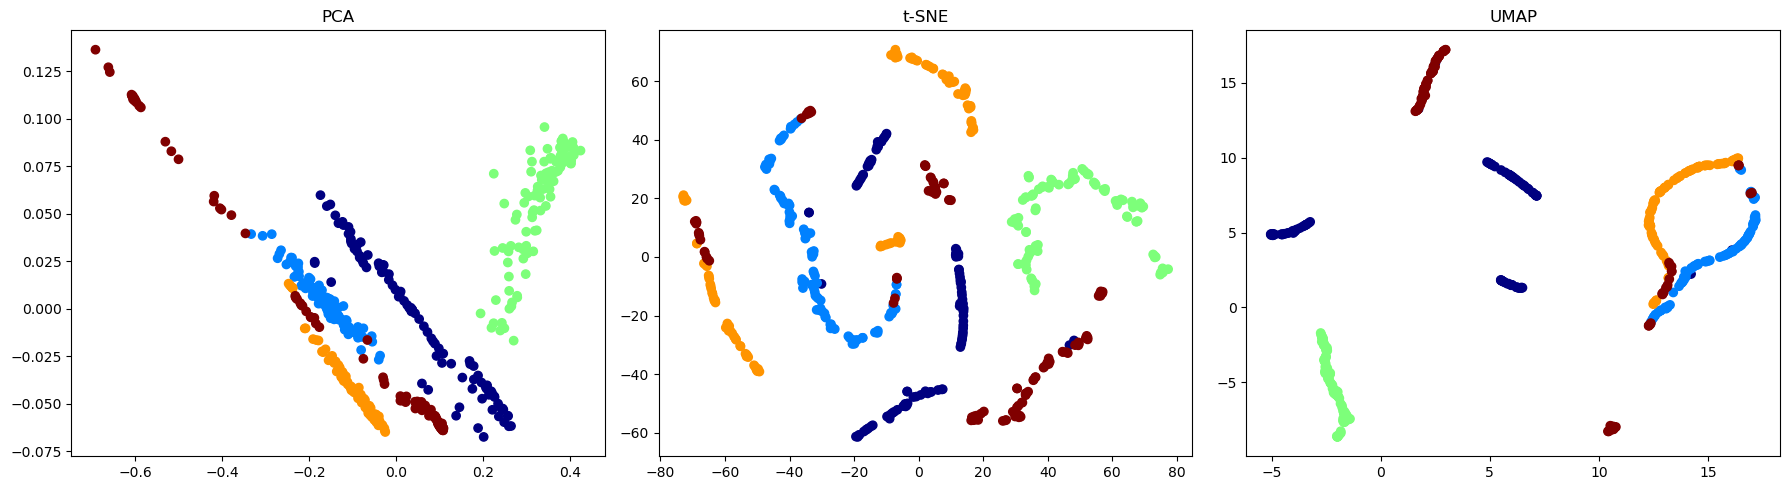

In [160]:
higher_visualization(cf_feats, cmap = 'jet')

/home/think/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/think/anaconda3/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/tmp/ipykernel_14010/432469901.py:67: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


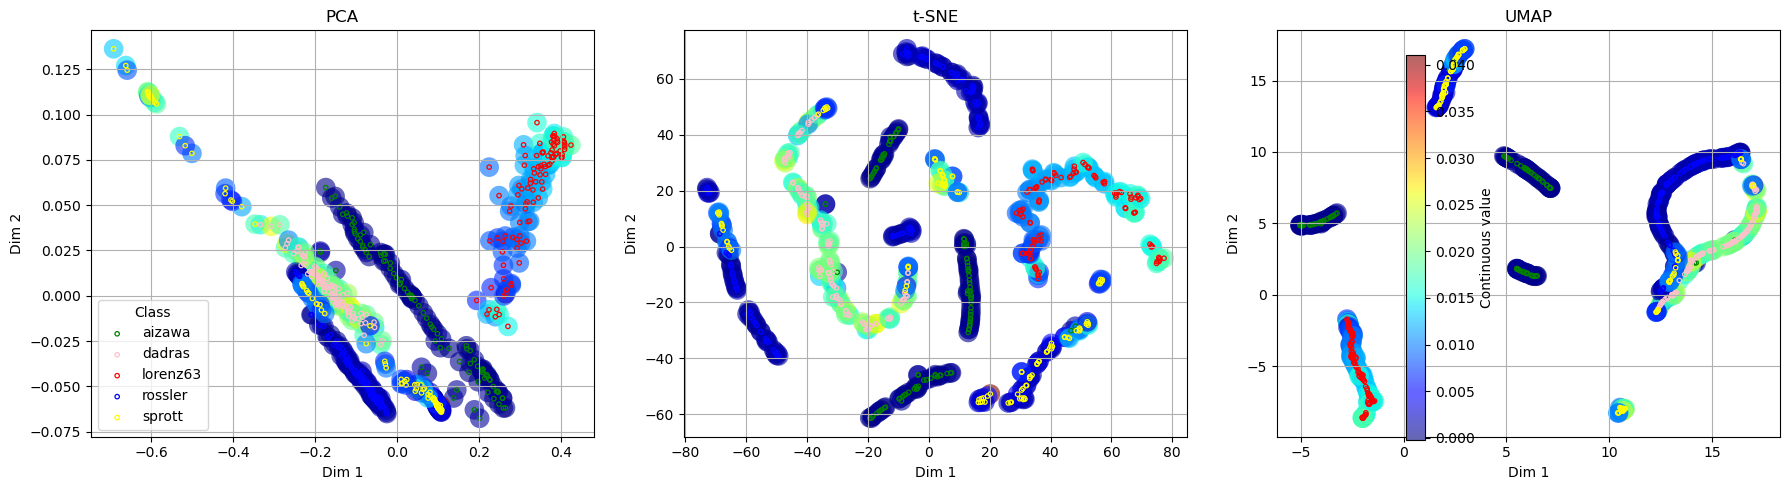

In [158]:
class_colors = {
    'lorenz63': 'red',
    'rossler': 'blue',
    'aizawa': 'green',
    'dadras': 'pink',
    'sprott': 'yellow'
}
fused_visualization(
    df=cf_feats,
    values=cf_feats['x_lyap'].values,
    cmap='jet',
    class_colors=class_colors
)

/home/think/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/think/anaconda3/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/tmp/ipykernel_14010/49593968.py:81: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


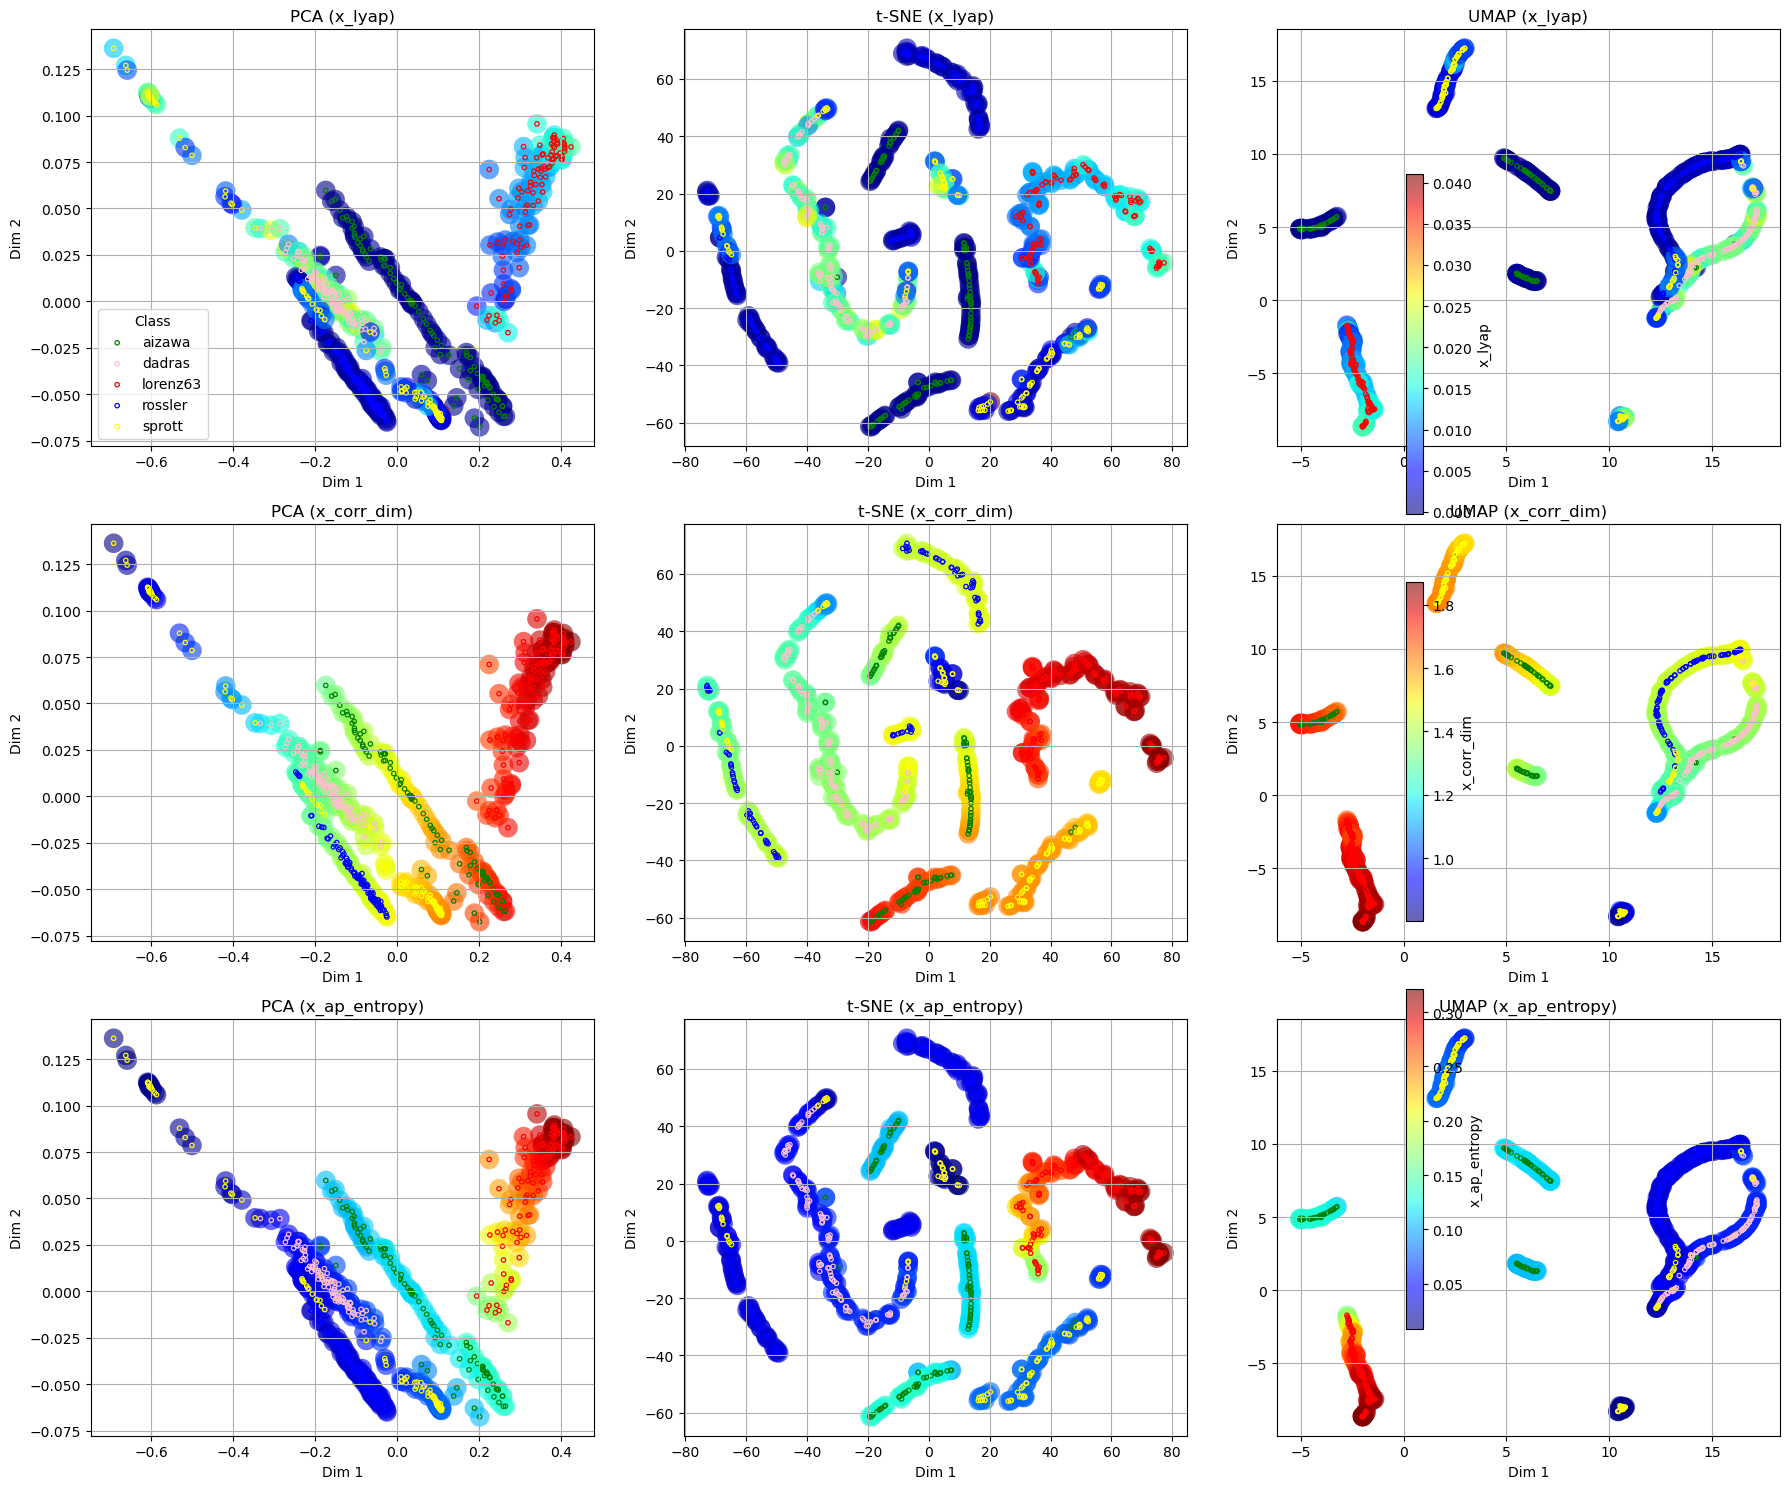

In [210]:
# Usage:
class_colors = {
    'lorenz63': 'red',
    'rossler': 'blue',
    'aizawa': 'green',
    'dadras': 'pink',
    'sprott': 'yellow'
}
fused_visualization_grid(
    df=cf_feats,
    feat_df=cf_feats[['x_lyap', 'x_corr_dim', 'x_ap_entropy']],
    cmap='jet',
    class_colors=class_colors
)

### Chaotic Features + tsfresh Features

In [129]:
All_feats.head()
All_feats.drop(All_feats.columns[[1]], axis=1, inplace=True)
All_feats.head()

id   ic_x   ic_y   ic_z    x_lyap  x_corr_dim  x_ap_entropy  \
0   1  0.100  0.100  0.100  0.000676    1.314140      0.067119   
1   2  0.109  0.109  0.109  0.001475    1.313687      0.067664   
2   3  0.118  0.118  0.118  0.001122    1.353055      0.069875   
3   4  0.127  0.127  0.127  0.001142    1.567679      0.087252   
4   5  0.136  0.136  0.136  0.000644    1.582371      0.088806   

   value__variance_larger_than_standard_deviation  value__has_duplicate_max  \
0                                             0.0                       0.0   
1                                             0.0                       0.0   
2                                             0.0                       0.0   
3                                             0.0                       0.0   
4                                             0.0                       0.0   

   value__has_duplicate_min  ...  value__fourier_entropy__bins_5  \
0                       0.0  ...                        0.079983   
1                       0.0  ...                        0.079983   
2                       0.0  ...                        0.079983   
3                       0.0  ...                        0.079983   
4                       0.0  ...                        0.079983   

   value__fourier_entropy__bins_10  value__fourier_entropy__bins_100  \
0                         0.136002                          0.181214   
1                         0.136002                          0.181214   
2                         0.136002                          0.181214   
3                         0.136002                          0.181214   
4                         0.136002                          0.181214   

   value__permutation_entropy__dimension_3__tau_1  \
0                                        0.764904   
1                                        0.764892   
2                                        0.764931   
3                                        0.764892   
4                                        0.764836   

   value__permutation_entropy__dimension_4__tau_1  \
0                                        0.836534   
1                                        0.836512   
2                                        0.837037   
3                                        0.836512   
4                                        0.836405   

   value__permutation_entropy__dimension_5__tau_1  \
0                                        0.909230   
1                                        0.908004   
2                                        0.909016   
3                                        0.908856   
4                                        0.908262   

   value__permutation_entropy__dimension_6__tau_1  \
0                                        0.981796   
1                                        0.980235   
2                                        0.980864   
3                                        0.981070   
4                                        0.981177   

   value__permutation_entropy__dimension_7__tau_1  \
0                                        1.054230   
1                                        1.052335   
2                                        1.054321   
3                                        1.055020   
4                                        1.054805   

   value__query_similarity_count__query_None__threshold_0.0  \
0                                                NaN          
1                                                NaN          
2                                                NaN          
3                                                NaN          
4                                                NaN          

   value__mean_n_absolute_max__number_of_maxima_7  
0                                        1.519426  
1                                        1.513167  
2                                        1.498174  
3                                        1.513693  
4                                        1.508167  

[5

In [130]:
nan_counts = All_feats.isna().sum()

for idx, col in enumerate(All_feats.columns):
    if nan_counts[col] > 0:
        print(idx, col, nan_counts[col])

788 value__query_similarity_count__query_None__threshold_0.0 500


In [131]:
All_feats.drop(All_feats.columns[[788]], axis=1, inplace=True)

In [132]:
All_feats.head()

id   ic_x   ic_y   ic_z    x_lyap  x_corr_dim  x_ap_entropy  \
0   1  0.100  0.100  0.100  0.000676    1.314140      0.067119   
1   2  0.109  0.109  0.109  0.001475    1.313687      0.067664   
2   3  0.118  0.118  0.118  0.001122    1.353055      0.069875   
3   4  0.127  0.127  0.127  0.001142    1.567679      0.087252   
4   5  0.136  0.136  0.136  0.000644    1.582371      0.088806   

   value__variance_larger_than_standard_deviation  value__has_duplicate_max  \
0                                             0.0                       0.0   
1                                             0.0                       0.0   
2                                             0.0                       0.0   
3                                             0.0                       0.0   
4                                             0.0                       0.0   

   value__has_duplicate_min  ...  value__fourier_entropy__bins_3  \
0                       0.0  ...                        0.079983   
1                       0.0  ...                        0.079983   
2                       0.0  ...                        0.079983   
3                       0.0  ...                        0.079983   
4                       0.0  ...                        0.079983   

   value__fourier_entropy__bins_5  value__fourier_entropy__bins_10  \
0                        0.079983                         0.136002   
1                        0.079983                         0.136002   
2                        0.079983                         0.136002   
3                        0.079983                         0.136002   
4                        0.079983                         0.136002   

   value__fourier_entropy__bins_100  \
0                          0.181214   
1                          0.181214   
2                          0.181214   
3                          0.181214   
4                          0.181214   

   value__permutation_entropy__dimension_3__tau_1  \
0                                        0.764904   
1                                        0.764892   
2                                        0.764931   
3                                        0.764892   
4                                        0.764836   

   value__permutation_entropy__dimension_4__tau_1  \
0                                        0.836534   
1                                        0.836512   
2                                        0.837037   
3                                        0.836512   
4                                        0.836405   

   value__permutation_entropy__dimension_5__tau_1  \
0                                        0.909230   
1                                        0.908004   
2                                        0.909016   
3                                        0.908856   
4                                        0.908262   

   value__permutation_entropy__dimension_6__tau_1  \
0                                        0.981796   
1                                        0.980235   
2                                        0.980864   
3                                        0.981070   
4                                        0.981177   

   value__permutation_entropy__dimension_7__tau_1  \
0                                        1.054230   
1                                        1.052335   
2                                        1.054321   
3                                        1.055020   
4                                        1.054805   

   value__mean_n_absolute_max__number_of_maxima_7  
0                                        1.519426  
1                                        1.513167  
2                                        1.498174  
3                                        1.513693  
4                                        1.508167  

[5 rows x 789 columns]

In [134]:
classes = ['aizawa', 'dadras', 'lorenz63', 'rossler', 'sprott']
sample_names = [cls for cls in classes for _ in range(100)]
All_feats['sample_name'] = sample_names
cols = ['sample_name'] + [col for col in All_feats.columns if col != 'sample_name']
All_feats = All_feats[cols]

In [152]:
All_feats.head()

sample_name  id   ic_x   ic_y   ic_z    x_lyap  x_corr_dim  x_ap_entropy  \
0      aizawa   1  0.100  0.100  0.100  0.000676    1.314140      0.067119   
1      aizawa   2  0.109  0.109  0.109  0.001475    1.313687      0.067664   
2      aizawa   3  0.118  0.118  0.118  0.001122    1.353055      0.069875   
3      aizawa   4  0.127  0.127  0.127  0.001142    1.567679      0.087252   
4      aizawa   5  0.136  0.136  0.136  0.000644    1.582371      0.088806   

   value__variance_larger_than_standard_deviation  value__has_duplicate_max  \
0                                             0.0                       0.0   
1                                             0.0                       0.0   
2                                             0.0                       0.0   
3                                             0.0                       0.0   
4                                             0.0                       0.0   

   ...  value__fourier_entropy__bins_3  value__fourier_entropy__bins_5  \
0  ...                        0.079983                        0.079983   
1  ...                        0.079983                        0.079983   
2  ...                        0.079983                        0.079983   
3  ...                        0.079983                        0.079983   
4  ...                        0.079983                        0.079983   

   value__fourier_entropy__bins_10  value__fourier_entropy__bins_100  \
0                         0.136002                          0.181214   
1                         0.136002                          0.181214   
2                         0.136002                          0.181214   
3                         0.136002                          0.181214   
4                         0.136002                          0.181214   

   value__permutation_entropy__dimension_3__tau_1  \
0                                        0.764904   
1                                        0.764892   
2                                        0.764931   
3                                        0.764892   
4                                        0.764836   

   value__permutation_entropy__dimension_4__tau_1  \
0                                        0.836534   
1                                        0.836512   
2                                        0.837037   
3                                        0.836512   
4                                        0.836405   

   value__permutation_entropy__dimension_5__tau_1  \
0                                        0.909230   
1                                        0.908004   
2                                        0.909016   
3                                        0.908856   
4                                        0.908262   

   value__permutation_entropy__dimension_6__tau_1  \
0                                        0.981796   
1                                        0.980235   
2                                        0.980864   
3                                        0.981070   
4                                        0.981177   

   value__permutation_entropy__dimension_7__tau_1  \
0                                        1.054230   
1                                        1.052335   
2                                        1.054321   
3                                        1.055020   
4                                        1.054805   

   value__mean_n_absolute_max__number_of_maxima_7  
0                                        1.519426  
1                                        1.513167  
2                                        1.498174  
3                                        1.513693  
4                                        1.508167  

[5 rows x 790 columns]

In [153]:
All_feats.drop(All_feats.columns[[1, 2, 3,4]], axis=1, inplace=True)

In [155]:
All_feats

sample_name    x_lyap  x_corr_dim  x_ap_entropy  \
0        aizawa  0.000676    1.314140      0.067119   
1        aizawa  0.001475    1.313687      0.067664   
2        aizawa  0.001122    1.353055      0.069875   
3        aizawa  0.001142    1.567679      0.087252   
4        aizawa  0.000644    1.582371      0.088806   
..          ...       ...         ...           ...   
495      sprott  0.017265    0.892692      0.012123   
496      sprott  0.025535    0.894955      0.012386   
497      sprott  0.013841    0.832390      0.009279   
498      sprott  0.013134    0.801393      0.008461   
499      sprott  0.008440    0.836239      0.008375   

     value__variance_larger_than_standard_deviation  value__has_duplicate_max  \
0                                               0.0                       0.0   
1                                               0.0                       0.0   
2                                               0.0                       0.0   
3                                               0.0                       0.0   
4                                               0.0                       0.0   
..                                              ...                       ...   
495                                             0.0                       0.0   
496                                             0.0                       0.0   
497                                             0.0                       0.0   
498                                             0.0                       0.0   
499                                             0.0                       0.0   

     value__has_duplicate_min  value__has_duplicate  value__sum_values  \
0                         0.0                   0.0        -143.879924   
1                         0.0                   0.0        -143.632062   
2                         0.0                   0.0        -112.465772   
3                         0.0                   0.0          23.481393   
4                         0.0                   0.0          25.192164   
..                        ...                   ...                ...   
495                       0.0                   0.0        5547.313116   
496                       0.0                   0.0        5497.434423   
497                       0.0                   0.0        5291.068264   
498                       0.0                   0.0        5414.145125   
499                       0.0                   0.0        5164.725268   

     value__abs_energy  ...  value__fourier_entropy__bins_3  \
0          2644.996813  ...                        0.079983   
1          2667.857669  ...                        0.079983   
2          2694.684224  ...                        0.079983   
3          2967.080827  ...                        0.079983   
4          2975.927512  ...                        0.079983   
..                 ...  ...                             ...   
495        4187.089872  ...                        0.045395   
496        4197.277340  ...                        0.045395   
497        3956.779732  ...                        0.045395   
498        3988.773859  ...                        0.090729   
499        3833.331688  ...                        0.045395   

     value__fourier_entropy__bins_5  value__fourier_entropy__bins_10  \
0                          0.079983                         0.136002   
1                          0.079983                         0.136002   
2                          0.079983                         0.136002   
3                          0.079983                         0.136002   
4                          0.079983                         0.136002   
..                              ...                              ...   
495                        0.090729                         0.136002   
496                        0.125256                         0.125256   
497                        0.125256                         0.125256   
498 

/home/think/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/think/anaconda3/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


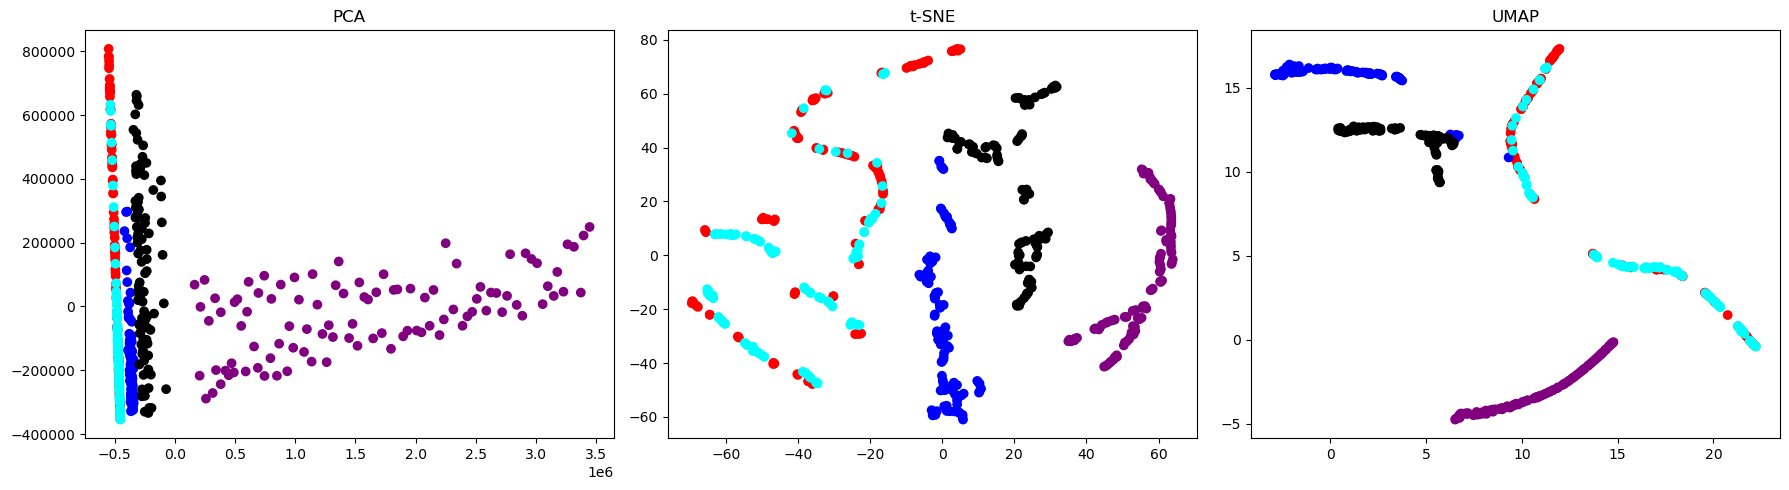

In [154]:
higher_visualization(All_feats, cmap = my_cmap)

/home/think/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/think/anaconda3/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/tmp/ipykernel_14010/432469901.py:67: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


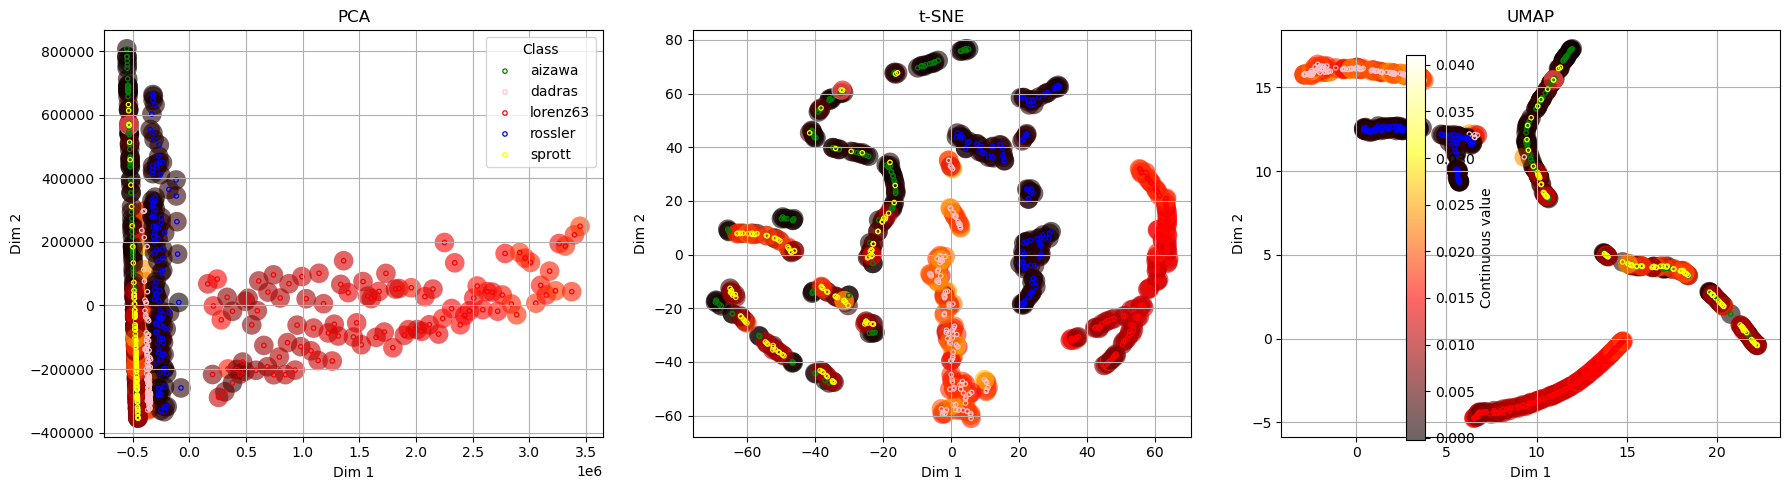

In [163]:
class_colors = {
    'lorenz63': 'red',
    'rossler': 'blue',
    'aizawa': 'green',
    'dadras': 'pink',
    'sprott': 'yellow'
}
fused_visualization(
    df=All_feats,
    values=cf_feats['x_lyap'].values,
    cmap='hot',
    class_colors=class_colors
)

/home/think/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/think/anaconda3/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/tmp/ipykernel_14010/49593968.py:81: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


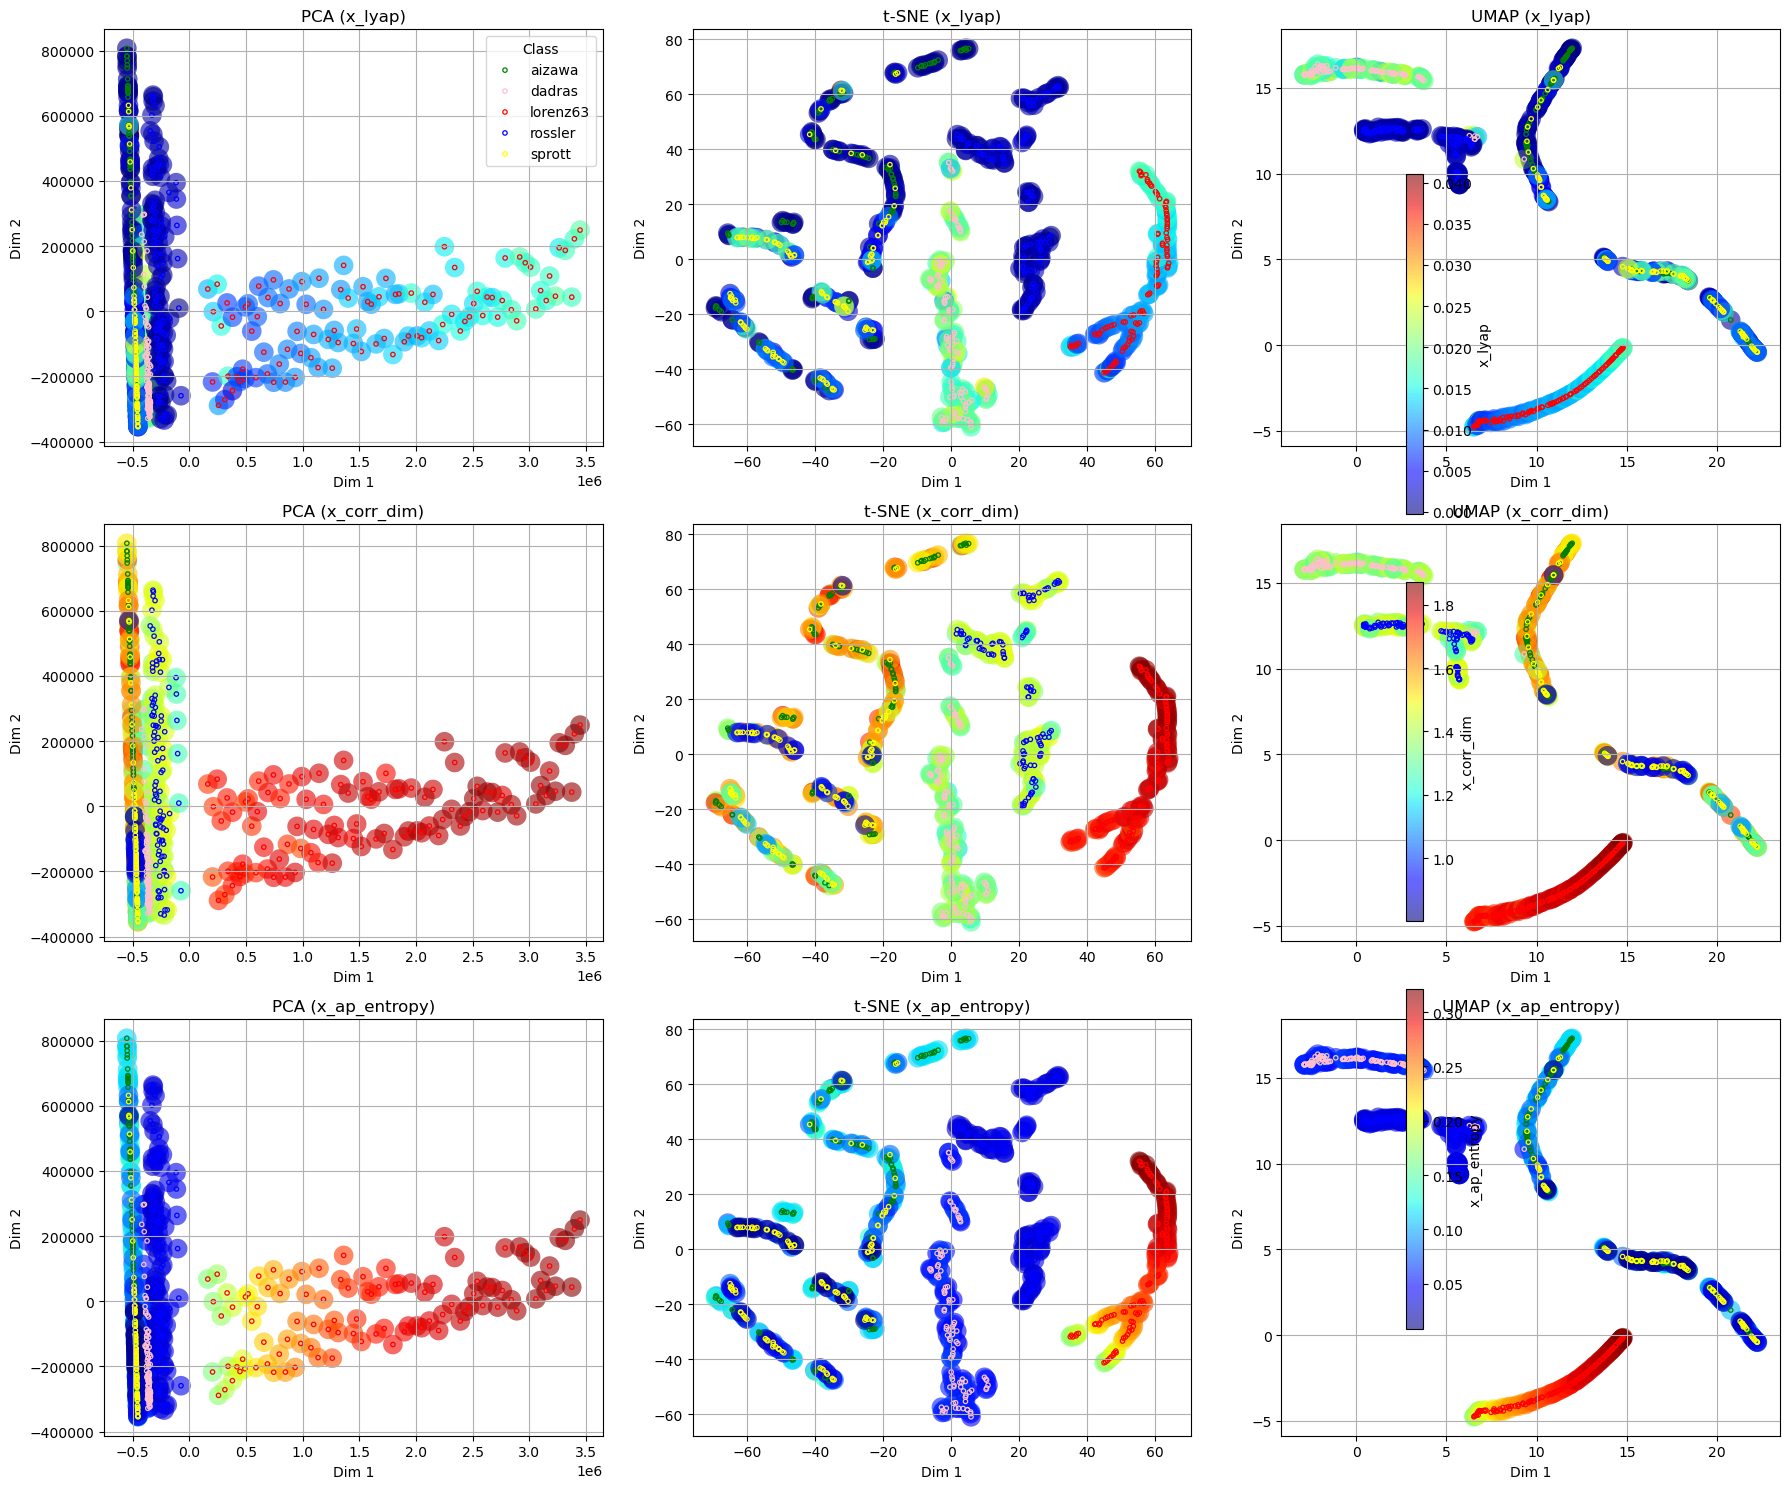

In [211]:
# Usage:
class_colors = {
    'lorenz63': 'red',
    'rossler': 'blue',
    'aizawa': 'green',
    'dadras': 'pink',
    'sprott': 'yellow'
}
fused_visualization_grid(
    df=All_feats,
    feat_df=cf_feats[['x_lyap', 'x_corr_dim', 'x_ap_entropy']],
    cmap='jet',
    class_colors=class_colors
)

### Chaotic Features + tsfresh Features scaled with Variance Filtering

In [212]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
import numpy as np

# X is your DF of shape (20, ~788)
X = All_feats.iloc[:, 2:].copy()

# 1. Use MinMaxScaler to normalize each feature to range [0, 1]
scaler = MinMaxScaler()
X_mm = scaler.fit_transform(X)

# Optionally wrap back to DataFrame to keep column names:
X_mm = pd.DataFrame(X_mm, index=X.index, columns=X.columns)

# 2. Compute variances
vars = X_mm.var(axis=0)
vars.describe()  # check distribution

# 3. Choose a threshold
# e.g. only keep features with variance > 0.005
threshold = 0

# 4. Apply VarianceThreshold
sel = VarianceThreshold(threshold=threshold)
X_highvar = sel.fit_transform(X_mm)
features_highvar = [f for f, keep in zip(X.columns, sel.get_support()) if keep]

print(f"Features kept: {len(features_highvar)} (threshold={threshold})")

X_filtered_step_1 = X_mm[features_highvar]

Features kept: 735 (threshold=0)


In [213]:
df_lookup.loc[299:301, ['sample_name']]

sample_name
299  lorenz63_99
300    rossler_0
301    rossler_1

In [214]:
classes = ['aizawa', 'dadras', 'lorenz63', 'rossler', 'sprott']
sample_names = [cls for cls in classes for _ in range(100)]
X_filtered_step_1['sample_name'] = sample_names
cols = ['sample_name'] + [col for col in X_filtered_step_1.columns if col != 'sample_name']
X_filtered_step_1 = X_filtered_step_1[cols]

/tmp/ipykernel_14010/1849842906.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_filtered_step_1['sample_name'] = sample_names


In [215]:
X_filtered_step_1

sample_name  x_corr_dim  x_ap_entropy  \
0        aizawa    0.478735      0.187899   
1        aizawa    0.478313      0.189644   
2        aizawa    0.515070      0.196713   
3        aizawa    0.715457      0.252298   
4        aizawa    0.729174      0.257267   
..          ...         ...           ...   
495      sprott    0.085243      0.011990   
496      sprott    0.087356      0.012832   
497      sprott    0.028941      0.002891   
498      sprott    0.000000      0.000275   
499      sprott    0.032535      0.000000   

     value__variance_larger_than_standard_deviation  value__sum_values  \
0                                               0.0           0.478725   
1                                               0.0           0.478732   
2                                               0.0           0.479589   
3                                               0.0           0.483329   
4                                               0.0           0.483376   
..                                              ...                ...   
495                                             0.0           0.635293   
496                                             0.0           0.633921   
497                                             0.0           0.628243   
498                                             0.0           0.631629   
499                                             0.0           0.624768   

     value__abs_energy  value__mean_abs_change  value__mean_change  \
0             0.000000                0.004906            0.477535   
1             0.000006                0.004966            0.486943   
2             0.000013                0.005039            0.495390   
3             0.000082                0.005679            0.494216   
4             0.000084                0.005719            0.497621   
..                 ...                     ...                 ...   
495           0.000392                0.000344            0.489560   
496           0.000394                0.000389            0.489173   
497           0.000333                0.000119            0.472438   
498           0.000341                0.000099            0.487854   
499           0.000302                0.000000            0.488814   

     value__mean_second_derivative_central  value__median  ...  \
0                                 0.606381       0.531094  ...   
1                                 0.607415       0.531004  ...   
2                                 0.605876       0.530962  ...   
3                                 0.601427       0.530904  ...   
4                                 0.601877       0.531110  ...   
..                                     ...            ...  ...   
495                               0.592821       0.670224  ...   
496                               0.592664       0.669712  ...   
497                               0.592670       0.664655  ...   
498                               0.592391       0.663274  ...   
499                               0.592141       0.661703  ...   

     value__fourier_entropy__bins_3  value__fourier_entropy__bins_5  \
0                          0.170766                        0.126670   
1                          0.170766                        0.126670   
2                          0.170766                        0.126670   
3                          0.170766                        0.126670   
4                          0.170766                        0.126670   
..                              ...                             ...   
495                        0.000000                        0.166026   
496                        0.000000                        0.292472   
497                        0.000000                        0.292472   
498                        0.223823                        0.292472   
499                        0.000000                        0.166026   

     value__fourier_entropy__bins_10  value__fourier_entropy__bins_100  \
0            

/home/think/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/think/anaconda3/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


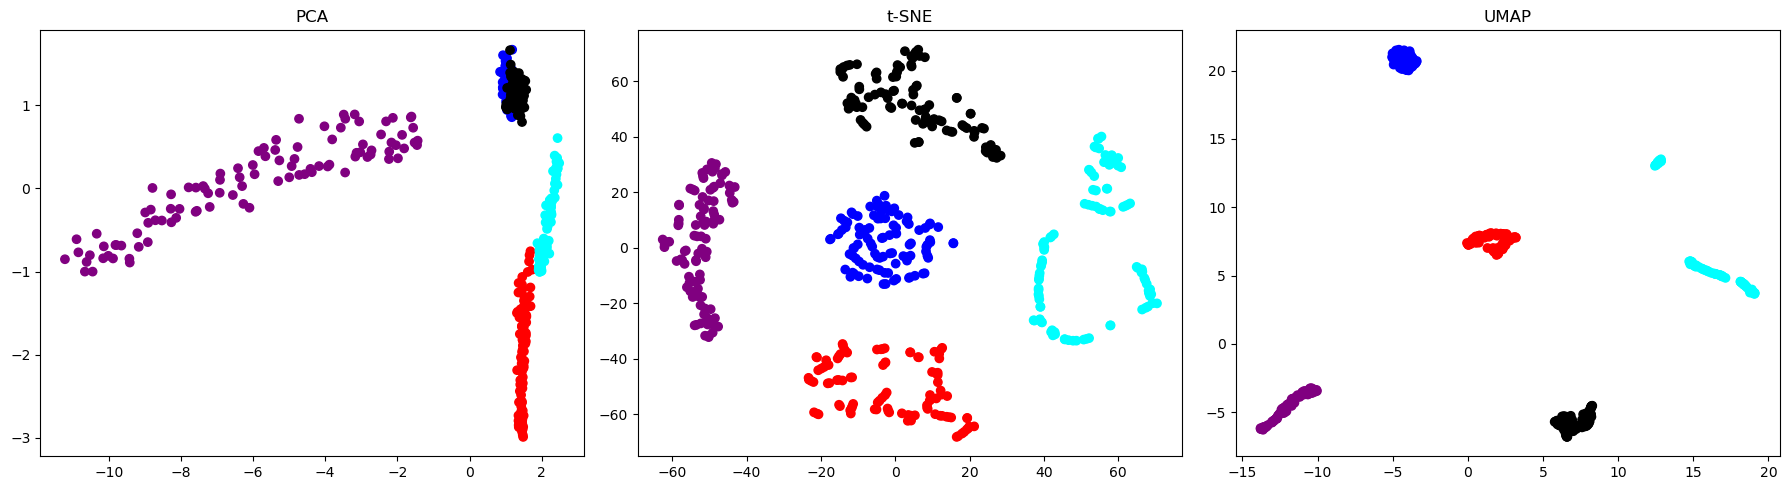

In [216]:
higher_visualization(X_filtered_step_1, cmap = my_cmap)

/home/think/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/think/anaconda3/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/tmp/ipykernel_14010/432469901.py:67: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


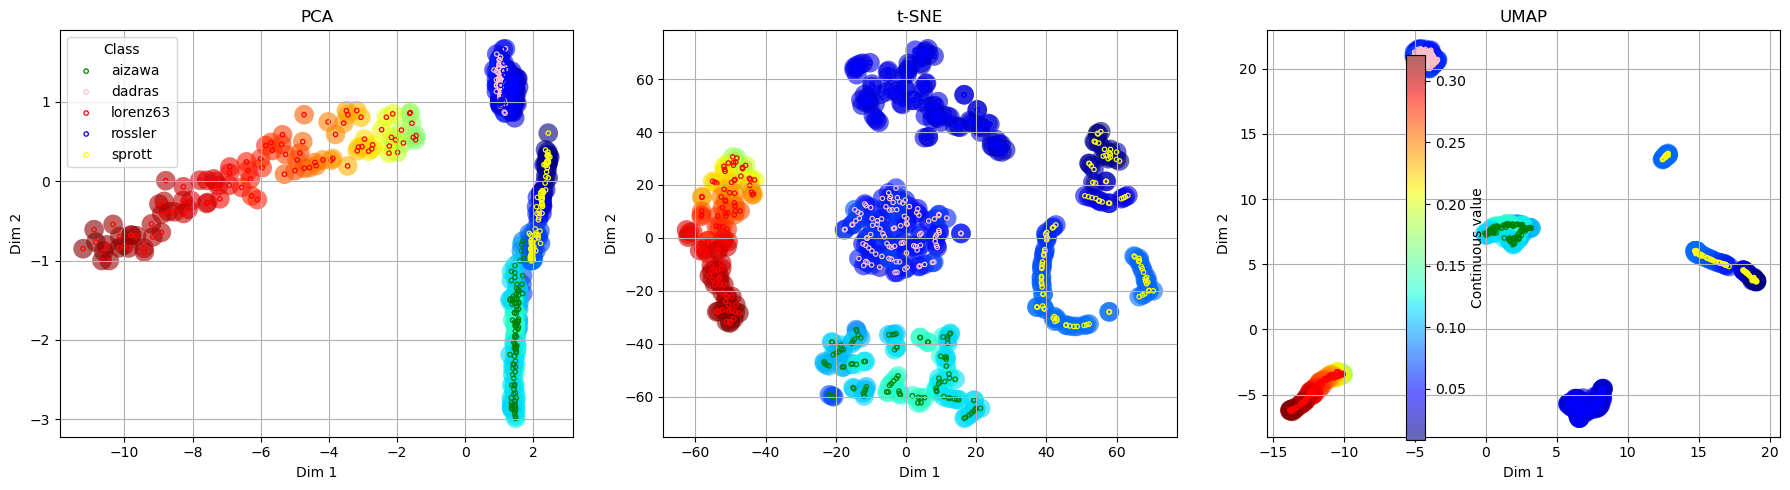

In [217]:
class_colors = {
    'lorenz63': 'red',
    'rossler': 'blue',
    'aizawa': 'green',
    'dadras': 'pink',
    'sprott': 'yellow'
}
fused_visualization(
    df=X_filtered_step_1,
    values=cf_feats['x_ap_entropy'].values,
    cmap='jet',
    class_colors=class_colors
)

/home/think/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/think/anaconda3/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/tmp/ipykernel_14010/49593968.py:81: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


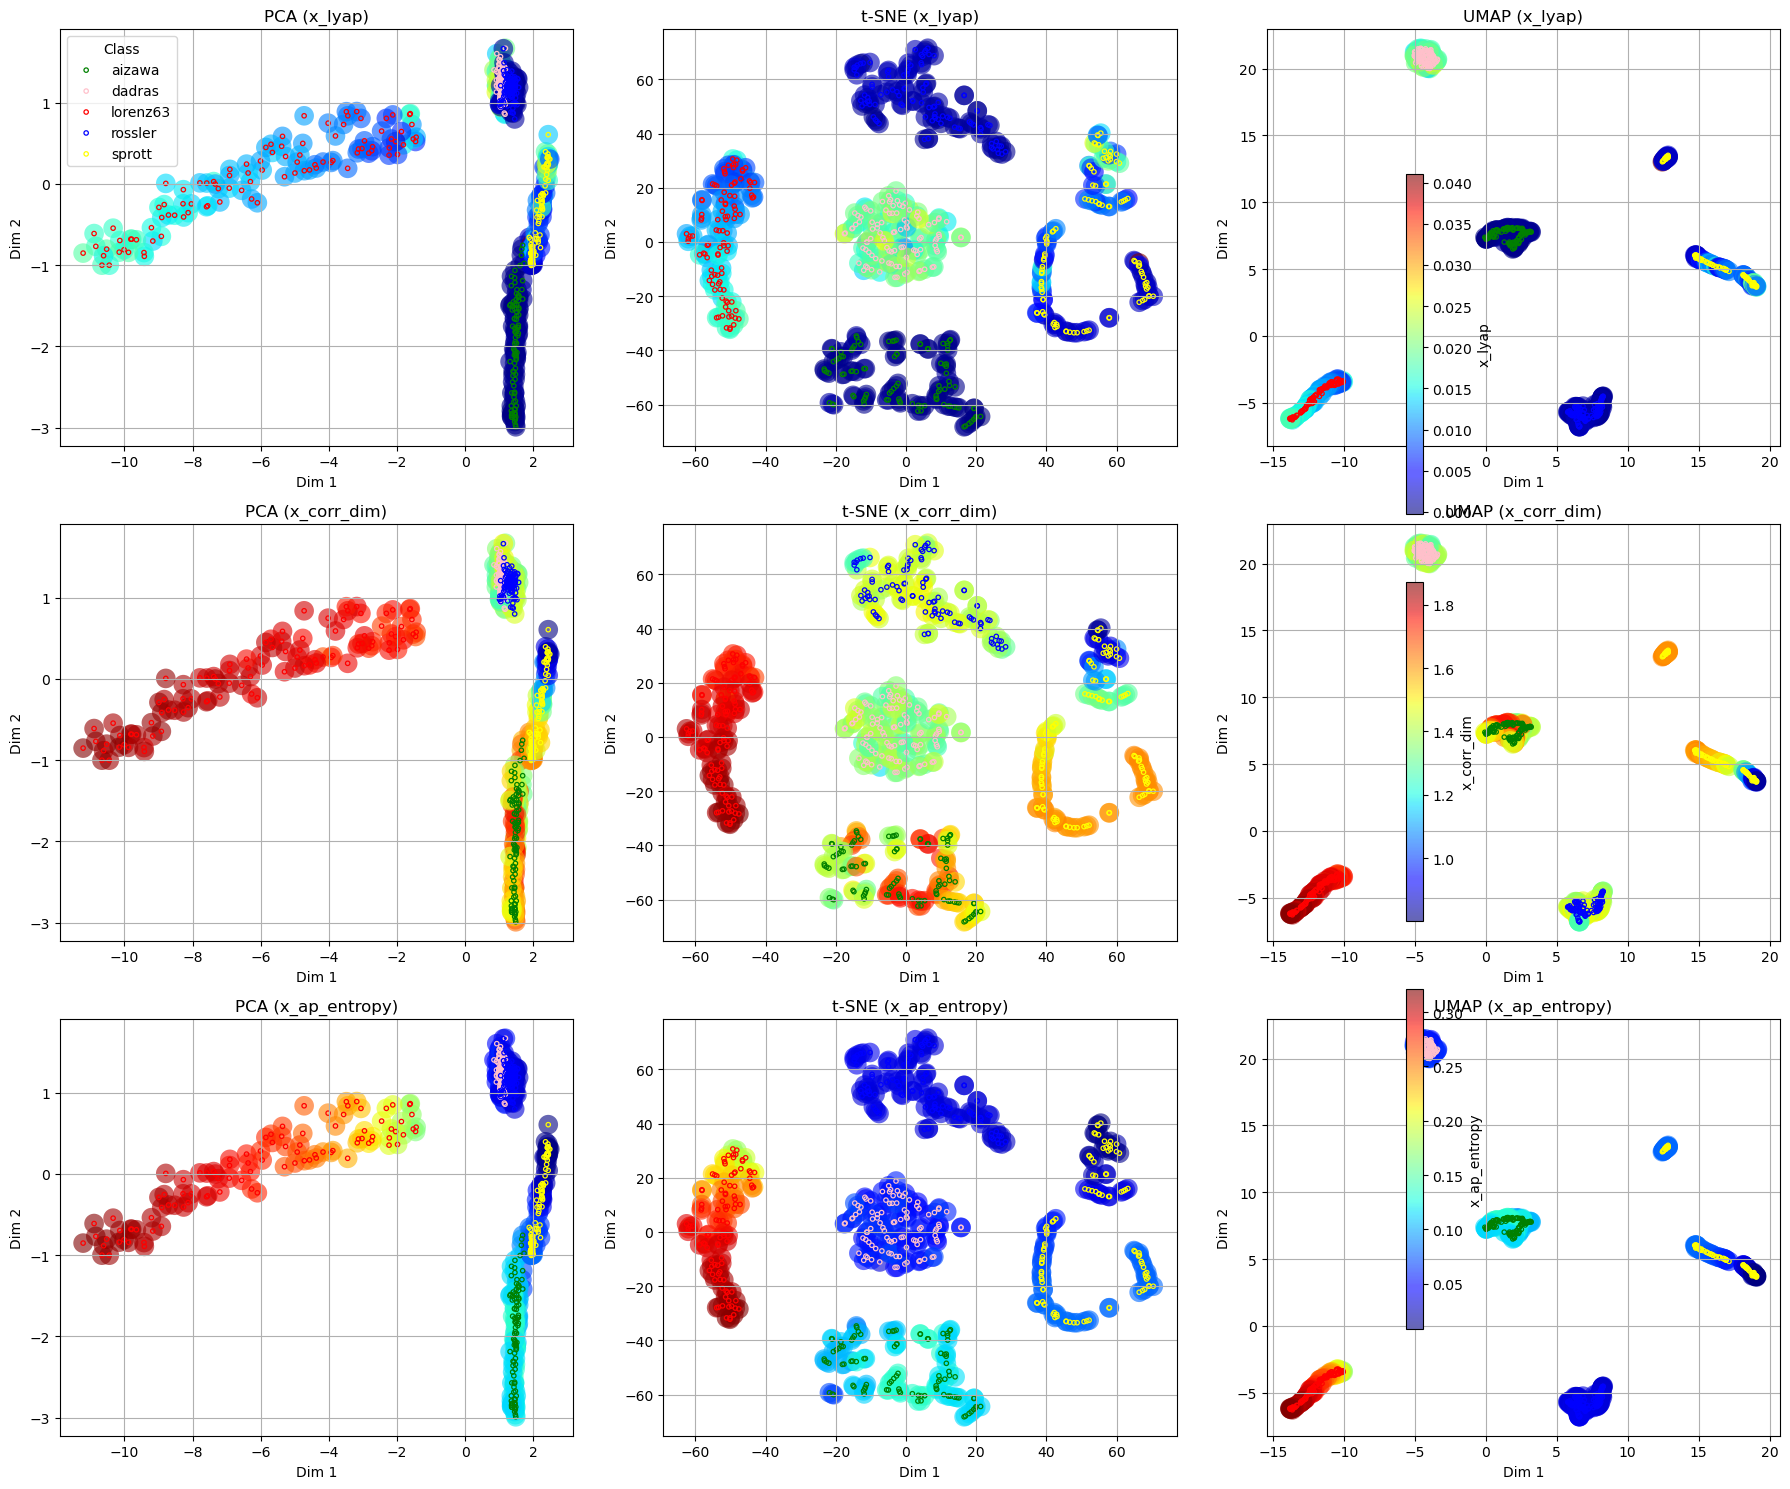

In [218]:
# Usage:
class_colors = {
    'lorenz63': 'red',
    'rossler': 'blue',
    'aizawa': 'green',
    'dadras': 'pink',
    'sprott': 'yellow'
}
fused_visualization_grid(
    df=X_filtered_step_1,
    feat_df=cf_feats[['x_lyap', 'x_corr_dim', 'x_ap_entropy']],
    cmap='jet',
    class_colors=class_colors
)

### Chaotic Features + tsfresh Features NON scaled with Variance Filtering

In [219]:
All_feats

sample_name    x_lyap  x_corr_dim  x_ap_entropy  \
0        aizawa  0.000676    1.314140      0.067119   
1        aizawa  0.001475    1.313687      0.067664   
2        aizawa  0.001122    1.353055      0.069875   
3        aizawa  0.001142    1.567679      0.087252   
4        aizawa  0.000644    1.582371      0.088806   
..          ...       ...         ...           ...   
495      sprott  0.017265    0.892692      0.012123   
496      sprott  0.025535    0.894955      0.012386   
497      sprott  0.013841    0.832390      0.009279   
498      sprott  0.013134    0.801393      0.008461   
499      sprott  0.008440    0.836239      0.008375   

     value__variance_larger_than_standard_deviation  value__has_duplicate_max  \
0                                               0.0                       0.0   
1                                               0.0                       0.0   
2                                               0.0                       0.0   
3                                               0.0                       0.0   
4                                               0.0                       0.0   
..                                              ...                       ...   
495                                             0.0                       0.0   
496                                             0.0                       0.0   
497                                             0.0                       0.0   
498                                             0.0                       0.0   
499                                             0.0                       0.0   

     value__has_duplicate_min  value__has_duplicate  value__sum_values  \
0                         0.0                   0.0        -143.879924   
1                         0.0                   0.0        -143.632062   
2                         0.0                   0.0        -112.465772   
3                         0.0                   0.0          23.481393   
4                         0.0                   0.0          25.192164   
..                        ...                   ...                ...   
495                       0.0                   0.0        5547.313116   
496                       0.0                   0.0        5497.434423   
497                       0.0                   0.0        5291.068264   
498                       0.0                   0.0        5414.145125   
499                       0.0                   0.0        5164.725268   

     value__abs_energy  ...  value__fourier_entropy__bins_3  \
0          2644.996813  ...                        0.079983   
1          2667.857669  ...                        0.079983   
2          2694.684224  ...                        0.079983   
3          2967.080827  ...                        0.079983   
4          2975.927512  ...                        0.079983   
..                 ...  ...                             ...   
495        4187.089872  ...                        0.045395   
496        4197.277340  ...                        0.045395   
497        3956.779732  ...                        0.045395   
498        3988.773859  ...                        0.090729   
499        3833.331688  ...                        0.045395   

     value__fourier_entropy__bins_5  value__fourier_entropy__bins_10  \
0                          0.079983                         0.136002   
1                          0.079983                         0.136002   
2                          0.079983                         0.136002   
3                          0.079983                         0.136002   
4                          0.079983                         0.136002   
..                              ...                              ...   
495                        0.090729                         0.136002   
496                        0.125256                         0.125256   
497                        0.125256                         0.125256   
498 

In [220]:
### Chaotic Features + tsfresh Features scaled with Variance Filtering
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
import numpy as np

# X is your DF of shape (20, ~788)
X = All_feats.iloc[:, 2:].copy()

# # 1. Use MinMaxScaler to normalize each feature to range [0, 1]
# scaler = MinMaxScaler()
# X_mm = scaler.fit_transform(X)

# # Optionally wrap back to DataFrame to keep column names:
# X_mm = pd.DataFrame(X_mm, index=X.index, columns=X.columns)

# 2. Compute variances
vars = X.var(axis=0)
vars.describe()  # check distribution

# 3. Choose a threshold
# e.g. only keep features with variance > 0.005
threshold = 10000000

# 4. Apply VarianceThreshold
sel = VarianceThreshold(threshold=threshold)
X_highvar = sel.fit_transform(X)
features_highvar = [f for f, keep in zip(X.columns, sel.get_support()) if keep]

print(f"Features kept: {len(features_highvar)} (threshold={threshold})")

X_filtered_step_1 = X[features_highvar]

Features kept: 35 (threshold=10000000)


In [221]:
classes = ['aizawa', 'dadras', 'lorenz63', 'rossler', 'sprott']
sample_names = [cls for cls in classes for _ in range(100)]
X_filtered_step_1['sample_name'] = sample_names
cols = ['sample_name'] + [col for col in X_filtered_step_1.columns if col != 'sample_name']
X_filtered_step_1 = X_filtered_step_1[cols]

/tmp/ipykernel_14010/1849842906.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_filtered_step_1['sample_name'] = sample_names


In [222]:
X_filtered_step_1

sample_name  value__sum_values  value__abs_energy  \
0        aizawa        -143.879924        2644.996813   
1        aizawa        -143.632062        2667.857669   
2        aizawa        -112.465772        2694.684224   
3        aizawa          23.481393        2967.080827   
4        aizawa          25.192164        2975.927512   
..          ...                ...                ...   
495      sprott        5547.313116        4187.089872   
496      sprott        5497.434423        4197.277340   
497      sprott        5291.068264        3956.779732   
498      sprott        5414.145125        3988.773859   
499      sprott        5164.725268        3833.331688   

     value__absolute_sum_of_changes  value__spkt_welch_density__coeff_2  \
0                        129.826014                           30.134161   
1                        131.155815                           30.591741   
2                        132.801575                           31.222048   
3                        147.101034                           35.630178   
4                        148.004988                           35.747899   
..                              ...                                 ...   
495                       27.810694                            1.611133   
496                       28.811560                            2.018161   
497                       22.779135                            1.250492   
498                       22.326904                            1.766054   
499                       20.113162                            0.859738   

     value__fft_coefficient__attr_"real"__coeff_0  \
0                                     -143.879924   
1                                     -143.632062   
2                                     -112.465772   
3                                       23.481393   
4                                       25.192164   
..                                            ...   
495                                   5547.313116   
496                                   5497.434423   
497                                   5291.068264   
498                                   5414.145125   
499                                   5164.725268   

     value__fft_coefficient__attr_"real"__coeff_13  \
0                                       -13.217385   
1                                       -26.395784   
2                                       -24.077699   
3                                       -45.251058   
4                                       -32.256428   
..                                             ...   
495                                     226.405747   
496                                     203.827967   
497                                     200.037432   
498                                     240.708284   
499                                     459.230899   

     value__fft_coefficient__attr_"real"__coeff_18  \
0                                       -51.197557   
1                                       -64.435534   
2                                       -51.058496   
3                                       -21.032562   
4                                       -19.122593   
..                                             ...   
495                                     -16.807274   
496                                     -17.772504   
497                                     220.954376   
498                                     216.710365   
499                                     192.245592   

     value__fft_coefficient__attr_"real"__coeff_19  \
0                                       -55.060538   
1                                       -67.234375   
2                                       -54.118810   
3                                        12.576792   
4                                        19.788564   
..                                             ...   
495                                      34.484557   
496                                     -49.772660 

/home/think/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/think/anaconda3/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


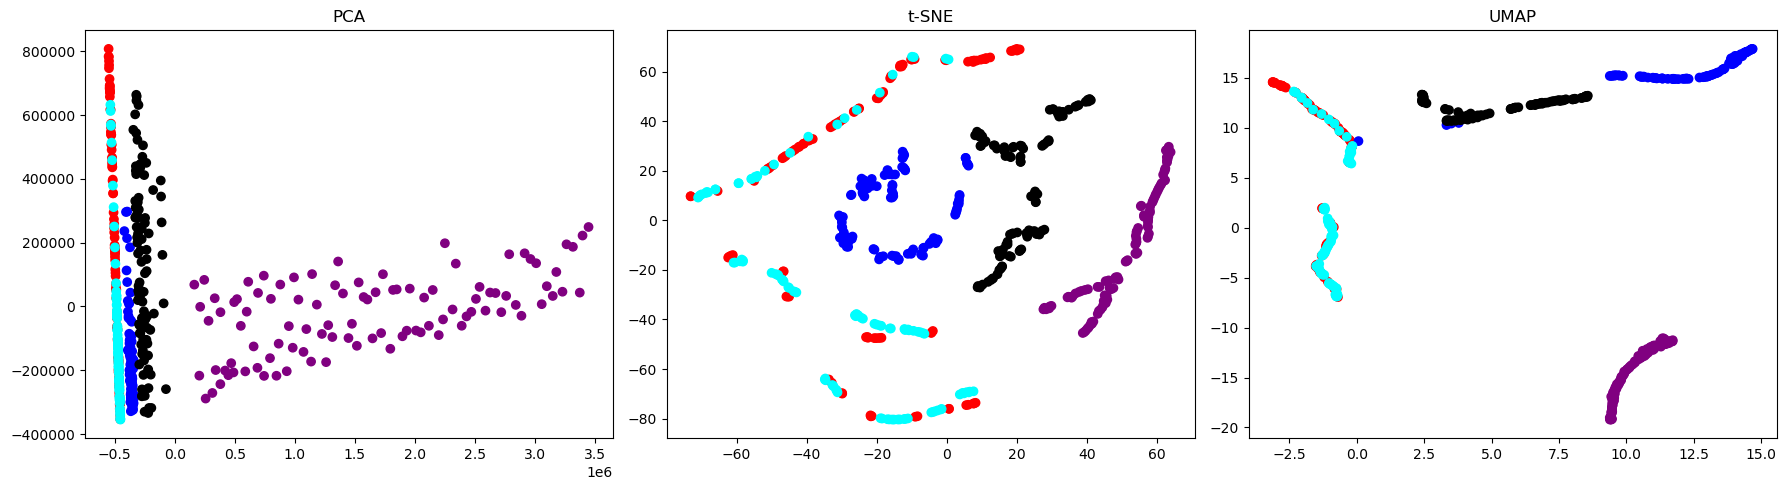

In [223]:
higher_visualization(X_filtered_step_1, cmap = my_cmap)

/home/think/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/think/anaconda3/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/tmp/ipykernel_14010/432469901.py:67: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


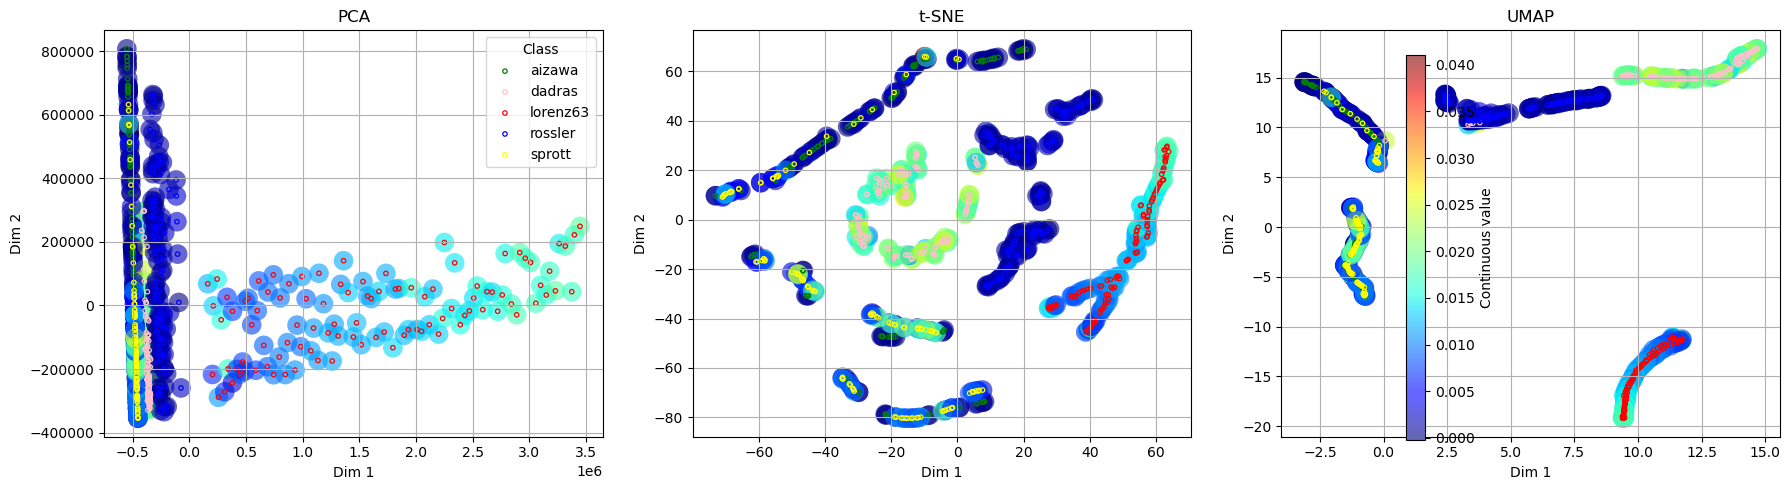

In [224]:
class_colors = {
    'lorenz63': 'red',
    'rossler': 'blue',
    'aizawa': 'green',
    'dadras': 'pink',
    'sprott': 'yellow'
}
fused_visualization(
    df=X_filtered_step_1,
    values=cf_feats['x_lyap'].values,
    cmap='jet',
    class_colors=class_colors
)

In [225]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import umap.umap_ as umap
import matplotlib.pyplot as plt
import numpy as np

def fused_visualization_grid(
    df,
    feat_df,             # full feature DataFrame
    cmap='jet',
    class_colors=None,
    alpha_overlay=0.6,
    marker_size_overlay=200,
    marker_size_outline=10,
    linewidths_outline=0.9
):
    # Labels and features
    y_raw = df.iloc[:, 0].values  # First column = labels
    X = df.iloc[:, 1:].values     # Rest = features
    le = LabelEncoder()
    y = le.fit_transform(y_raw)
    unique_classes = list(np.unique(y_raw))
    feature_names = list(feat_df.columns)
    n_feats = len(feature_names)

    # Compute embeddings
    X_pca = PCA(n_components=2).fit_transform(X)
    X_tsne = TSNE(n_components=2, perplexity=5, random_state=0).fit_transform(X)
    X_umap = umap.UMAP(random_state=0).fit_transform(X)
    embeddings = [X_pca, X_tsne, X_umap]
    titles = ['PCA', 't-SNE', 'UMAP']

    # Prepare big subplot grid: one row per feature, one column per embedding
    fig, axs = plt.subplots(
        n_feats, len(embeddings), 
        figsize=(6 * len(embeddings), 5 * n_feats)
    )

    for i, feature_name in enumerate(feature_names):
        values = feat_df[feature_name].values
        for j, (coords, title) in enumerate(zip(embeddings, titles)):
            pc1, pc2 = coords[:, 0], coords[:, 1]
            ax = axs[i, j] if n_feats > 1 else axs[j]

            # Colored overlay
            sc = ax.scatter(
                pc1, pc2,
                c=values,
                cmap=cmap,
                s=marker_size_overlay,
                alpha=alpha_overlay,
                edgecolor='none'
            )

            # Outlines
            for cls in unique_classes:
                mask = y_raw == cls
                ax.scatter(
                    pc1[mask], pc2[mask],
                    facecolors='none',
                    edgecolor=class_colors.get(cls, 'black') if class_colors else 'black',
                    linewidths=linewidths_outline,
                    label=cls,
                    s=marker_size_outline
                )
            ax.set_title(f"{title} ({feature_name})")
            ax.grid(True)
            ax.set_xlabel('Dim 1')
            ax.set_ylabel('Dim 2')

    # Colorbar — one per feature row
    for i in range(n_feats):
        cbar = fig.colorbar(
            axs[i, -1].collections[0], ax=axs[i, :], orientation='vertical'
        )
        cbar.set_label(feature_names[i])

    # Legends on the top-left subplot only
    axs[0, 0].legend(title='Class', loc='best')
    plt.tight_layout()
    plt.show()


/home/think/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/think/anaconda3/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/tmp/ipykernel_14010/3065836665.py:81: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


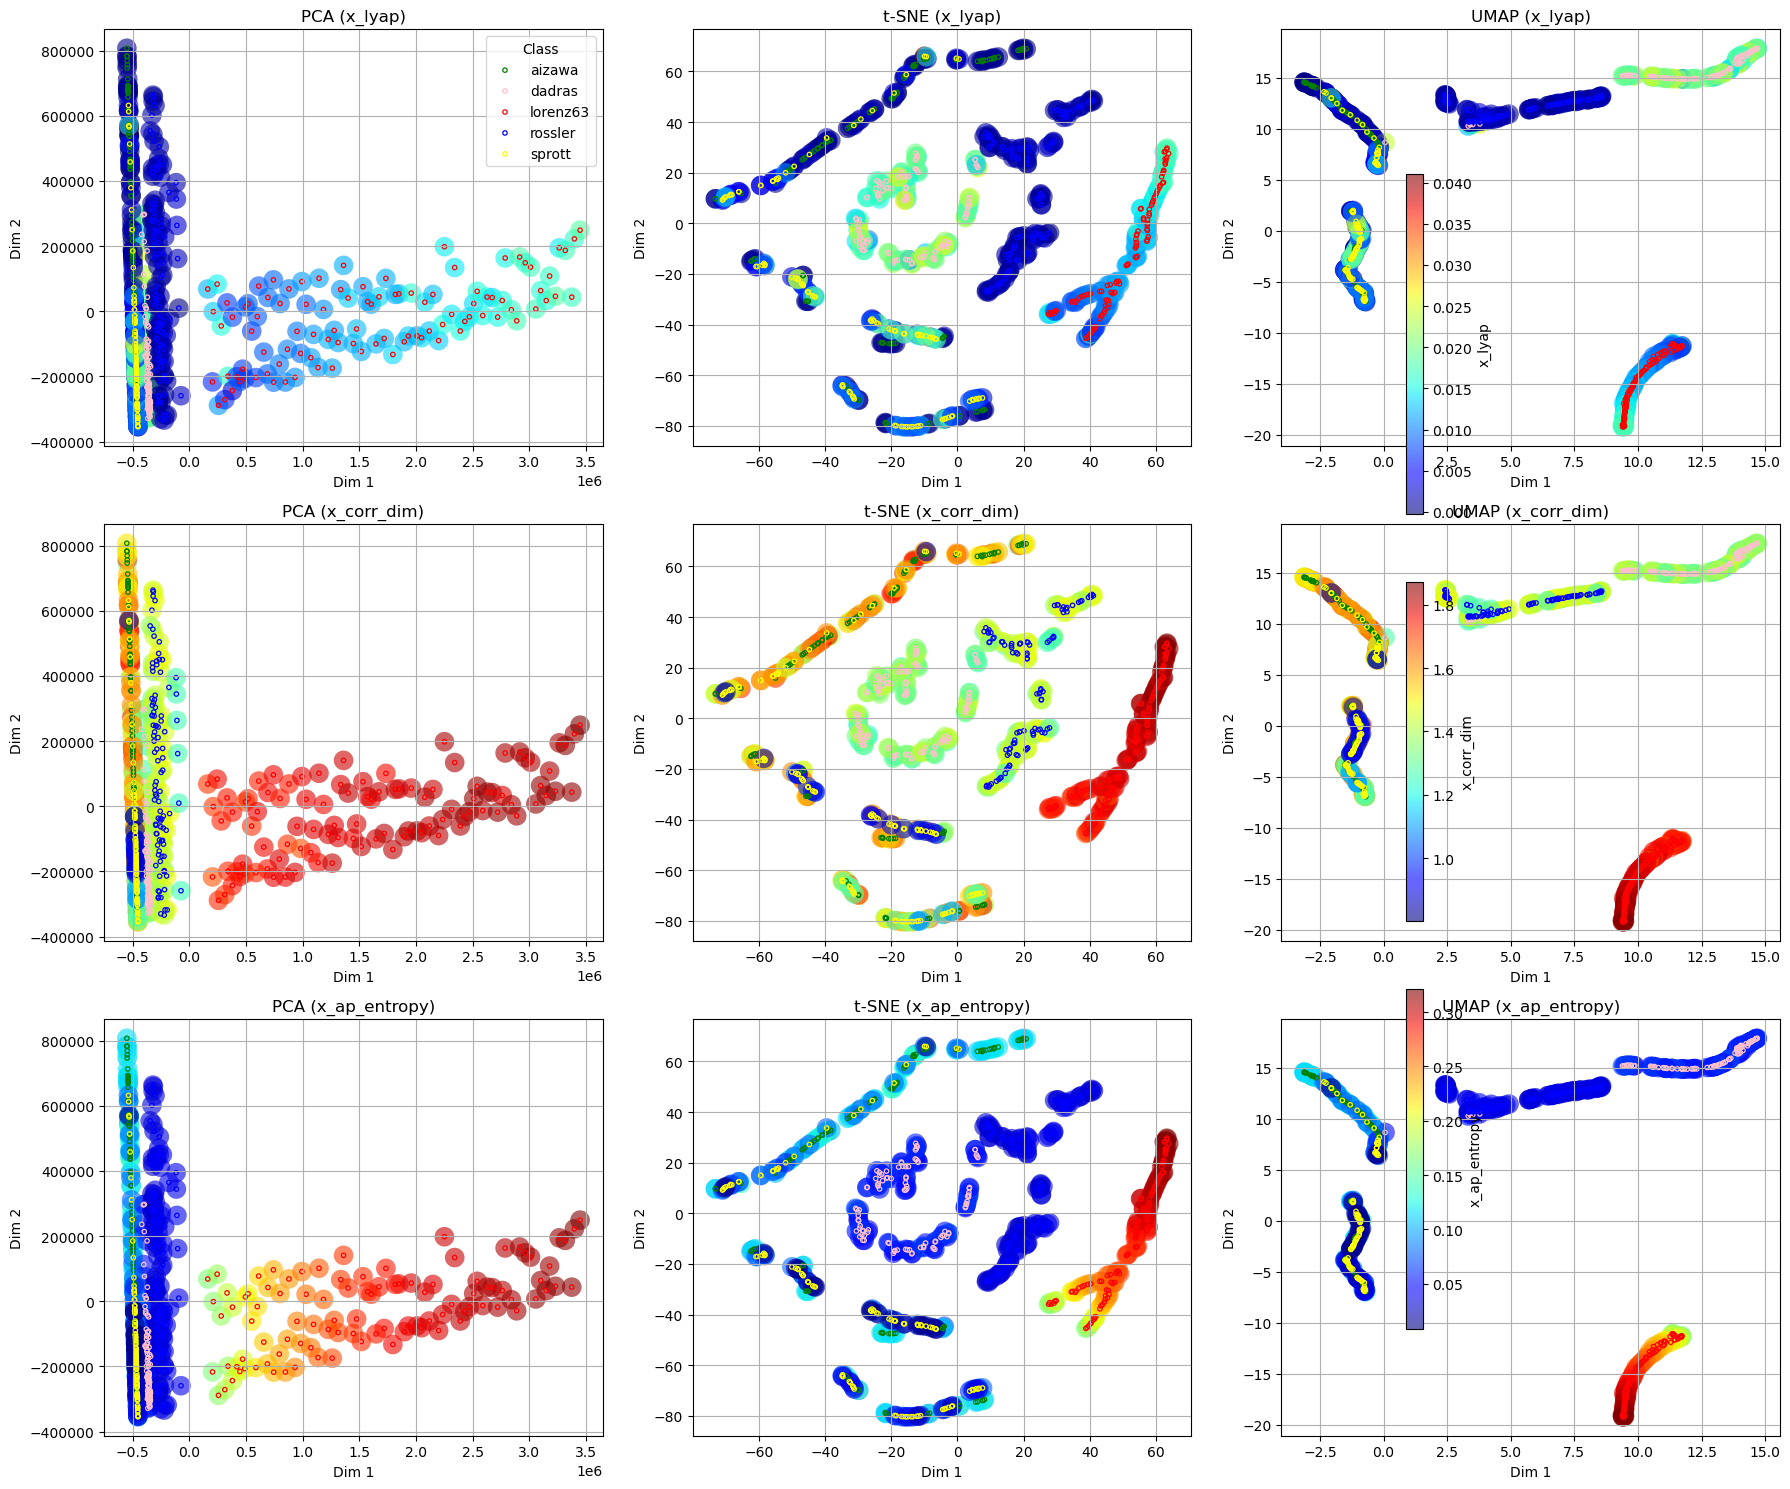

In [226]:
# Usage:
class_colors = {
    'lorenz63': 'red',
    'rossler': 'blue',
    'aizawa': 'green',
    'dadras': 'pink',
    'sprott': 'yellow'
}
fused_visualization_grid(
    df=X_filtered_step_1,
    feat_df=cf_feats[['x_lyap', 'x_corr_dim', 'x_ap_entropy']],
    cmap='jet',
    class_colors=class_colors
)